In [3]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import zipfile
from IPython.display import display, Image
from scipy import ndimage, misc
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

from skimage import color, io
from scipy.misc import imresize

np.random.seed(133)

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

IMAGE_SIZE = 227 

In [4]:
from six.moves import cPickle as pickle
pickle_file = 'catfish.pickle'
try:
    with open(pickle_file) as f:
        save=pickle.load(f)
except Exception as e:
  print('Unable to load data from', pickle_file, ':', e)
  raise
    
train_images_sane=save['train_images_sane']
train_images=save['train_images']
insane_indices=save['insane_indices']
test_images=save['test_images']



In [5]:
def read_image(filepath):
    im = io.imread(filepath)
    # scale
    (w, h,_) = im.shape
    if (w>h): # height is greater than width
        resizeto = (IMAGE_SIZE, int (round (IMAGE_SIZE * (float (h)  / w))));
    else:
        resizeto = (int (round (IMAGE_SIZE * (float (w)  / h))), IMAGE_SIZE);
    im = misc.imresize(im, resizeto, interp='bicubic').astype(np.float32) # it's float32 as of now
    # swap RBG->BGR
    im = im[:, :, ::-1]
    
    # remove mean (sueezenet mean values)
    im[:, :, 0] -= 104.006 # B
    im[:, :, 1] -= 116.669 # G
    im[:, :, 2] -= 122.679 # R

    
    # padd with 0 (since we're already mean centered the 0 os correct value for padding)
    paddim=np.array((IMAGE_SIZE,IMAGE_SIZE))-np.array(resizeto)
    npad=((0,paddim[0]),(0,paddim[1]),(0,0))
    im = np.pad(im,npad, mode='constant')
    return im

def unprocess_image(im):   
    # restore mean (sueezenet mean values)
    im[:, :, 0] += 104.006
    im[:, :, 1] += 116.669
    im[:, :, 2] += 122.679
    
    # swap RBGR->RBG
    im = im[:, :, ::-1]
    
    return im

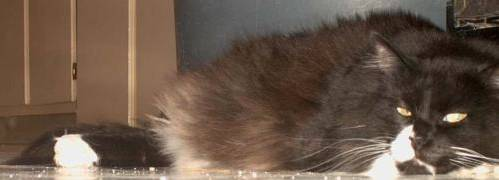

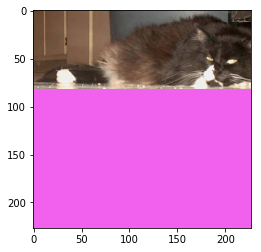

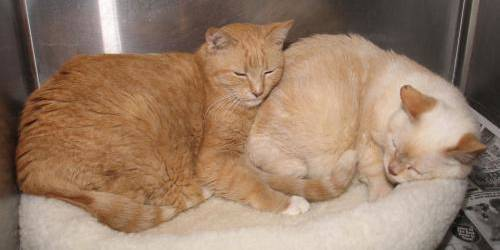

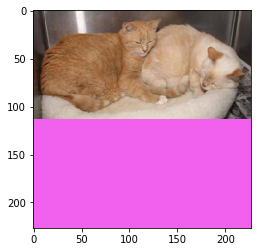

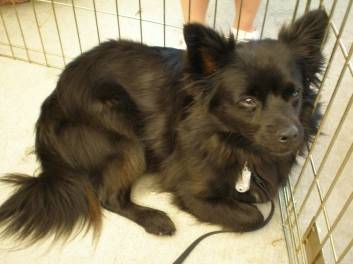

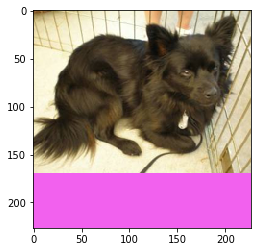

In [16]:
num=1185
display(Image(train_images[insane_indices[num]]))
im=read_image(train_images[insane_indices[num]])
plt.imshow(unprocess_image(im)*255)
plt.show()

num=1698
display(Image(train_images_sane[num]))
im=read_image(train_images_sane[num])
plt.imshow(unprocess_image(im)*255)
plt.show()

num=1698
display(Image(test_images[num]))
im=read_image(test_images[num])
plt.imshow(unprocess_image(im)*255)
plt.show()



In [32]:
X_hard = np.array([read_image(train_images[i]) for i in insane_indices])
Y_hard = np.array([int('dog' in train_images[i]) for i in insane_indices])

np.save('catfish-X_hard.npy',X_hard)
np.save('catfish-Y_hard.npy',Y_hard)

X_hard=''
Y_hard=''

import gc
gc.collect()

In [ ]:
X_train = np.array([read_image(train_images_sane[i]) for i in xrange(len(train_images_sane))])
Y_train = np.array([int('dog' in train_images_sane[i]) for i in xrange(len(train_images_sane))])


In [34]:
np.save('catfish-X_train.npy',X_train)
np.save('catfish-Y_train.npy',Y_train)

In [37]:
X_train=''
Y_train=''

import gc
gc.collect()

0

In [20]:
X_test = np.array([read_image(test_images[i]) for i in xrange(len(test_images))])
X_test = X_test.astype('float32')

np.save('catfish-X_test.npy',X_test)

In [25]:
# %%timeit -r1

# import gzip

# f = gzip.GzipFile("catfish-X_test.npy.gz", "w")
# np.save(f, X_test)
# f.close()
